# Example notebook illusrtating the usage of the compartmental.Model class
## Nazmi Burak Budanur (IST Austria)
### February 9, 2021 

In [79]:
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt
import compartmental
from scipy.integrate import odeint
from IPython.display import display, Math
reload(compartmental)

<module 'compartmental' from '/home/nbudanur/neubauten/compartmental/compartmental.py'>

In [80]:
# Generate a model

compartments = [
    ('S'    , {"layer" : 1}),    # Susceptible
    ('I'    , {"layer" : 2}),    # Infectious
    ('R'    , {"layer" : 3}),    # Removed (recovered/dead)
]

parameters = [
    'beta',     # avg cont. / pers. / day * prob(asymp. trans.)
    'gamma',    # (days)^-1 Inverse mean exposed period  
    'N',
]

rates = [
    ('S', 'I', {"label" : "beta * S * I / N"}), 
    ('I', 'R', {"label" : "gamma * I"})
]

model = compartmental.Model()
model.set_compartments(compartments)
model.set_rates(rates)
model.set_parameters(parameters)

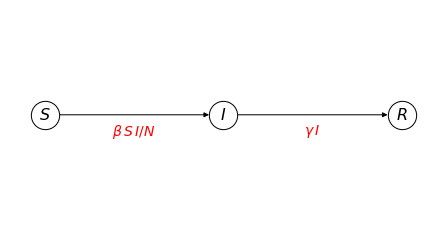

In [81]:
fig = model.visualize(figsize=(6,3))

In [82]:
ode_latex, ode_symbolic, ode = model.generate_ode()
display(Math(ode_latex))

<IPython.core.display.Math object>

In [86]:
# Run an epidemic simulation with 
# N = 1e6, gamma = 1/5 (days^-1), beta = 0.6 
# i.e. R_0 = beta / gamma = 3 ~ covid-19

parameter_values = [1, 2.0 ** -1, 1e6]
initial_population = np.array([1e6 - 100, 100, 0]) # 1 initial infection
simulation_time = np.arange(0, 365)

population = odeint(ode, 
                    initial_population, 
                    simulation_time, 
                    args = (parameter_values,))

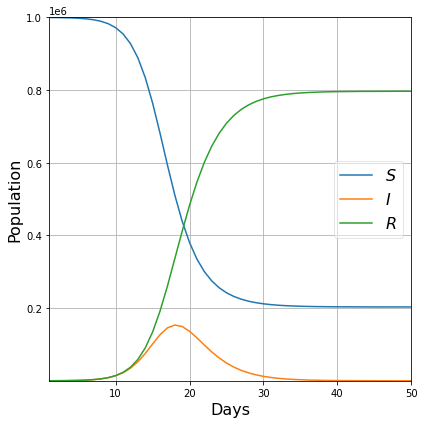

In [87]:
fig = plt.figure(figsize=(6,6))
ax  = fig.gca()

model.plot_compartment(simulation_time, population, 'S', ax=ax)
model.plot_compartment(simulation_time, population, 'I', ax=ax)
model.plot_compartment(simulation_time, population, 'R', ax=ax)

ax.set_xlim(1, 50)
ax.set_ylim(1e-1, 1e6)
ax.grid(True)
ax.set_xlabel('Days', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
plt.tight_layout()

plt.savefig("results.png", dpi=200)

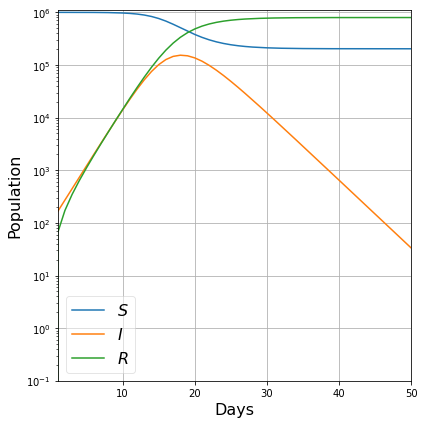

In [88]:
fig = plt.figure(figsize=(6,6))
ax  = fig.gca()

model.plot_compartment(simulation_time, population, 'S', ax=ax)
model.plot_compartment(simulation_time, population, 'I', ax=ax)
model.plot_compartment(simulation_time, population, 'R', ax=ax)

ax.set_xlim(1, 50)
ax.set_ylim(1e-1, 1.1e6)
ax.grid(True)
ax.set_xlabel('Days', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
ax.set_yscale('log')
plt.tight_layout()

plt.savefig("results.png", dpi=200)